In [20]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pprint

In [21]:
# Load dataset
dataset_path = '/Users/rrs/Desktop/abs-mdp/data/pinball_simple_obs.pt'
debug_data = '/Users/rrs/Desktop/abs-mdp/data/pinball_simple_obs_debug.pt'
dataset = torch.load(dataset_path)
debug = torch.load(debug_data)


In [22]:

# Split dataset into states, actions, rewards, etc.
obs, actions, next_obs, rewards, executed, duration, initiation_masks = zip(*dataset)

In [23]:
def process_reward(rewards, duration):
    rewards = map(lambda r, duration: sum(r)/duration if duration > 0 else 0, rewards, duration)
    return np.array(list(rewards))

In [24]:
# Convert to numpy arrays
obs = np.array(obs)
actions = np.array(actions)
next_obs = np.array(next_obs)
executed = np.array(executed)
initiation_masks = np.array(initiation_masks)
rewards = process_reward(rewards, duration)
duration = np.array(duration)
# Sample dataset
N = obs.shape[0]


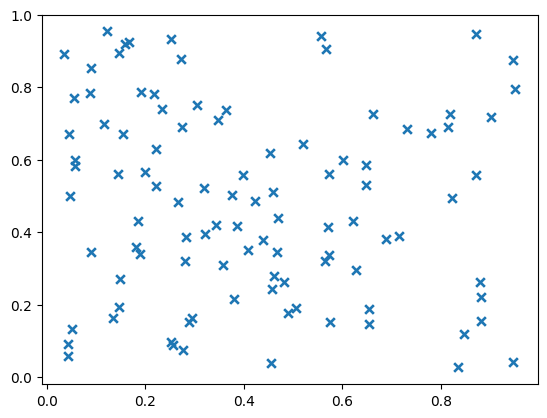

In [25]:
latent_states = debug['latent_states']
s = np.array(list(map(lambda x: x['state'], latent_states)))
next_s = np.array(list(map(lambda x: x['next_state'], latent_states)))

# plot initial positions
plt.scatter(s[:,0], s[:,1], marker='x')


In [26]:
# Visualize overlayed pixel observations
def overlay_image(obs, next_obs):
    return (obs+next_obs)/2

In [27]:
# Compute statistics

for a in range(max(actions)+1):
    print(f'Action {a}:')
    idx = actions == a
    _executed = executed[idx]
    # rewards
    mean_reward = rewards[idx][_executed==1]
    print(f'\tMax reward: {mean_reward.max()}', f'\tMean reward: {mean_reward.mean()}', f'\tMin reward: {mean_reward.min()}')
    # duration
    mean_duration = duration[idx][_executed==1].mean()
    print(f'\tMax duration: {duration[idx].max()}', f'\tMean duration: {mean_duration}', f'\tMin duration: {duration[idx].min()}')
    # executed
    mean_executed = executed[idx].mean()
    print(f'\tProbability of initial execution: {mean_executed}')

Action 0:
	Max reward: 10000.0 	Mean reward: 149.83928571428572 	Min reward: -5.0
	Max duration: 1000 	Mean duration: 418.4 	Min duration: 0
	Probability of initial execution: 0.7
Action 1:
	Max reward: 10000.0 	Mean reward: 272.0615384615385 	Min reward: -5.0
	Max duration: 1000 	Mean duration: 444.55384615384617 	Min duration: 0
	Probability of initial execution: 0.65
Action 2:
	Max reward: -5.0 	Mean reward: -5.0 	Min reward: -5.0
	Max duration: 1000 	Mean duration: 354.5466666666667 	Min duration: 0
	Probability of initial execution: 0.75
Action 3:
	Max reward: 10000.0 	Mean reward: 132.05479452054794 	Min reward: -5.0
	Max duration: 1000 	Mean duration: 342.4246575342466 	Min duration: 0
	Probability of initial execution: 0.73


In [28]:
pp = pprint.pprint(debug['stats'])

{0: {'avg_duration': 292.88,
     'avg_reward': 149.83928571428572,
     'max_reward': 10000.0,
     'min_reward': -5.0,
     'prob_executions': 0.7,
     'state_change_max': array([0.03902432, 0.06578784, 0.37354465, 0.33266453]),
     'state_change_mean': array([ 0.01296372, -0.05977986, -0.54570606, -0.51994278]),
     'state_change_min': array([-0.0343689 , -0.10414508, -1.19225718, -1.86093855])},
 1: {'avg_duration': 288.96,
     'avg_reward': 272.0615384615385,
     'max_reward': 10000.0,
     'min_reward': -5.0,
     'prob_executions': 0.65,
     'state_change_max': array([0.05706679, 0.1460633 , 0.27521022, 0.96603151]),
     'state_change_mean': array([ 0.01412414,  0.08287413, -0.52717871, -0.52107554]),
     'state_change_min': array([-0.03054531, -0.02480275, -1.02132793, -1.22297669])},
 2: {'avg_duration': 265.91,
     'avg_reward': -5.0,
     'max_reward': -5.0,
     'min_reward': -5.0,
     'prob_executions': 0.75,
     'state_change_max': array([ 0.01069045,  0.034046

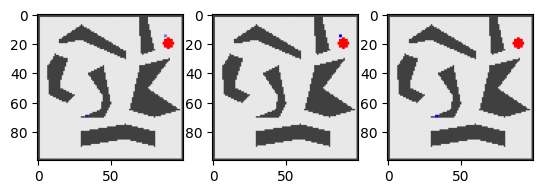

In [29]:
# Random observations
sample = np.random.choice(N, 2, replace=False)
obs1, obs2 = obs[sample]
plt.subplot(1, 3, 1)
plt.imshow(overlay_image(obs1, obs2))
plt.subplot(1, 3, 2)
plt.imshow(obs1)
plt.subplot(1, 3, 3)
plt.imshow(obs2)

[0.87054809 0.9465126  0.59943175 0.16036584]
[0.83540012 0.02646569 0.6945443  0.27222536]
[0.48251532 0.26193635 0.54881457 0.66281573]
[0.95081268 0.79393384 0.80214008 0.27820966]


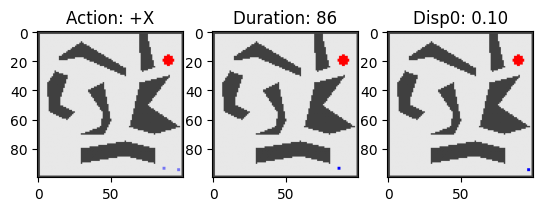

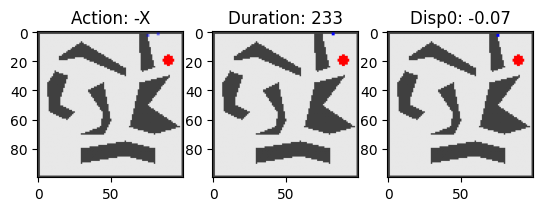

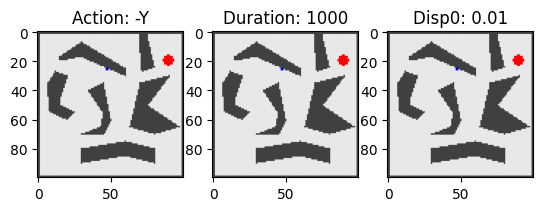

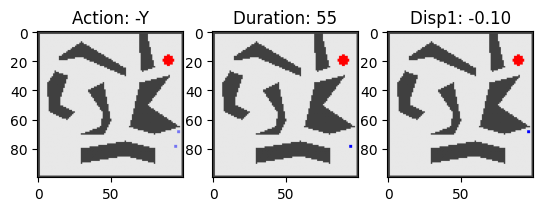

In [34]:
# Sample observations for executed actions
n_samples = 4
executed_idx = executed == 1
obs_executed = obs[executed_idx]
next_obs_executed = next_obs[executed_idx]
sampled_indices = np.random.choice(obs_executed.shape[0], n_samples, replace=False)

action_executed = actions[executed_idx][sampled_indices]
s_executed = s[executed_idx]
next_s_executed = next_s[executed_idx]

# Plot Executed executed
for sample in range(n_samples):
    # plt.subplot(4, 1, sample+1)
    plt.figure()
    # set action name as title
    plt.subplot(1, 3, 1)
    plt.title(f'Action: {debug["options"][action_executed[sample]]}')
    plt.imshow(overlay_image(obs_executed[sampled_indices[sample]], next_obs_executed[sampled_indices[sample]]))
    plt.subplot(1, 3, 2)
    plt.title(f'Duration: {duration[executed_idx][sampled_indices[sample]]}')
    plt.imshow(obs_executed[sampled_indices[sample]])
    plt.subplot(1, 3, 3)
    disp = next_s_executed[sampled_indices[sample]] - s_executed[sampled_indices[sample]]
    print(s_executed[sampled_indices[sample]])
    i = np.argmax(np.abs(disp[:2]))
    plt.title(f'Disp{i}: {disp[i]:.2f}')
    plt.imshow(next_obs_executed[sampled_indices[sample]])

[0.3428941  0.42066796 0.58108574 0.84723033]
[0.38585895 0.41776005 0.59902132 0.1870535 ]
[0.27402199 0.69042446 0.62385273 0.52592427]
[0.43878657 0.37711814 0.67165567 0.91178977]


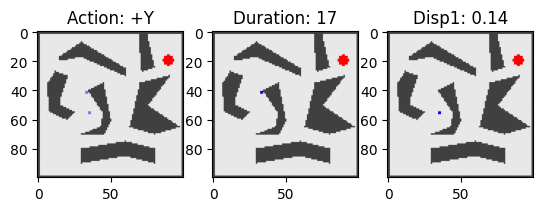

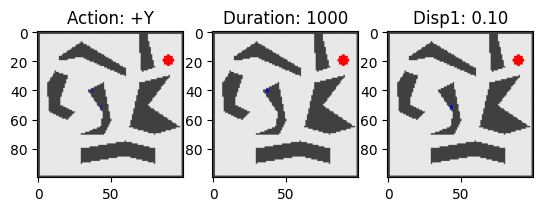

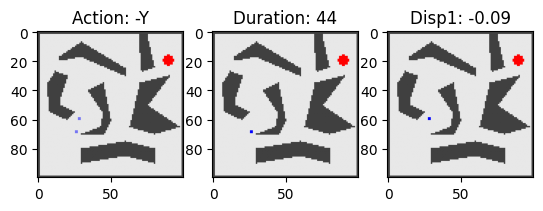

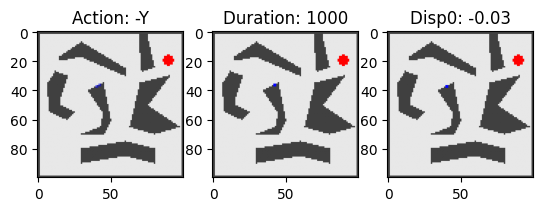

In [35]:
# Sample observations for executed actions
n_samples = 4
actions_ = np.logical_and(np.logical_or(actions==0, actions==1), executed==1)
executed_idx = actions_ #executed == 1
obs_executed = obs[executed_idx]
next_obs_executed = next_obs[executed_idx]
sampled_indices = np.random.choice(obs_executed.shape[0], n_samples, replace=False)

action_executed = actions[executed_idx][sampled_indices]
s_executed = s[executed_idx]
next_s_executed = next_s[executed_idx]

# Plot Executed executed
for sample in range(n_samples):
    # plt.subplot(4, 1, sample+1)
    plt.figure()
    # set action name as title
    plt.subplot(1, 3, 1)
    plt.title(f'Action: {debug["options"][action_executed[sample]]}')
    plt.imshow(overlay_image(obs_executed[sampled_indices[sample]], next_obs_executed[sampled_indices[sample]]))
    plt.subplot(1, 3, 2)
    plt.title(f'Duration: {duration[executed_idx][sampled_indices[sample]]}')
    plt.imshow(obs_executed[sampled_indices[sample]])
    plt.subplot(1, 3, 3)
    disp = next_s_executed[sampled_indices[sample]] - s_executed[sampled_indices[sample]]
    print(s_executed[sampled_indices[sample]])
    i = np.argmax(np.abs(disp[:2]))
    plt.title(f'Disp{i}: {disp[i]:.2f}')
    plt.imshow(next_obs_executed[sampled_indices[sample]])